In [42]:
!apt install swig cmake libopenmpi-dev zlib1g-dev
!pip install stable-baselines==2.5.1 box2d box2d-kengz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
libopenmpi-dev is already the newest version (2.1.1-8).
swig is already the newest version (3.0.12-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


Box(8,)
Discrete(4)
episode: 0/50, score: 161.10201977247945
Average over last 100 episode: 161.10 

episode: 1/50, score: 204.44064254295023
Average over last 100 episode: 182.77 

episode: 2/50, score: 222.27087289610677
Average over last 100 episode: 195.94 

episode: 3/50, score: 235.40419205167814
Average over last 100 episode: 205.80 

episode: 4/50, score: 188.70915810984778
Average over last 100 episode: 202.39 

episode: 5/50, score: 265.77322381611407
Average over last 100 episode: 212.95 

episode: 6/50, score: 277.3307157122598
Average over last 100 episode: 222.15 

episode: 7/50, score: 281.8985673575412
Average over last 100 episode: 229.62 

episode: 8/50, score: 217.29884085646924
Average over last 100 episode: 228.25 

episode: 9/50, score: 228.44195919559857
Average over last 100 episode: 228.27 

episode: 10/50, score: 276.7153915518054
Average over last 100 episode: 232.67 

episode: 11/50, score: 273.74834622007006
Average over last 100 episode: 236.09 

episode: 

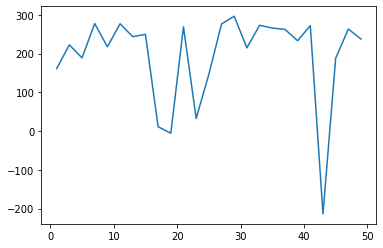

In [61]:
# Landing pad is always at coordinates (0,0). Coordinates are the first
# two numbers in state vector. Reward for moving from the top of the screen
# to landing pad and zero speed is about 100..140 points. If lander moves
# away from landing pad it loses reward back. Episode finishes if the lander
# crashes or comes to rest, receiving additional -100 or +100 points.
# Each leg ground contact is +10. Firing main engine is -0.3 points each frame.
# Solved is 200 points. Landing outside landing pad is possible. Fuel is
# infinite, so an agent can learn to fly and then land on its first attempt.
# Four discrete actions available: do nothing, fire left orientation engine,
# fire main engine, fire right orientation engine.


import gym
import random
from keras import Sequential
from collections import deque
from keras.layers import Dense
from keras.optimizers import adam
import matplotlib.pyplot as plt
from keras.activations import relu, linear

import numpy as np
env = gym.make('LunarLander-v2')
env.seed(0)
np.random.seed(0)


class DQN:

    """ Implementation of deep q learning algorithm """

    def __init__(self, action_space, state_space):
        self.action_space = action_space
        self.state_space = state_space
        self.epsilon = 1.0
        self.gamma = .99
        self.batch_size = 64
        self.epsilon_min = .03
        self.lr = 0.001
        self.epsilon_decay = .996
        self.memory = deque(maxlen=1000000)
        self.model = self.build_model()

    def build_model(self):
        model = Sequential()
        model.add(Dense(150, input_dim=self.state_space, activation=relu))
        model.add(Dense(120, activation=relu))
        model.add(Dense(self.action_space, activation=linear))
        model.compile(loss='mse', optimizer=adam(lr=self.lr))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self):
        if len(self.memory) < self.batch_size:
            return
        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([i[0] for i in minibatch])
        actions = np.array([i[1] for i in minibatch])
        rewards = np.array([i[2] for i in minibatch])
        next_states = np.array([i[3] for i in minibatch])
        dones = np.array([i[4] for i in minibatch])

        states = np.squeeze(states)
        next_states = np.squeeze(next_states)

        targets = rewards + self.gamma*(np.amax(self.model.predict_on_batch(next_states), axis=1))*(1-dones)
        targets_full = self.model.predict_on_batch(states)
        ind = np.array([i for i in range(self.batch_size)])
        targets_full[[ind], [actions]] = targets

        self.model.fit(states, targets_full, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


def train_dqn(episode, agent = None):
    loss = []
    if agent == None:
      agent = DQN(env.action_space.n, env.observation_space.shape[0])
    for e in range(episode):
        state = env.reset()
        state = np.reshape(state, (1, 8))
        score = 0
        max_steps = 3000
        for i in range(max_steps):
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            score += reward
            next_state = np.reshape(next_state, (1, 8))
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            agent.replay()
            if done:
                print("episode: {}/{}, score: {}".format(e, episode, score))
                break
        loss.append(score)

        # Average score of last 100 episode
        is_solved = np.mean(loss[-100:])
        if is_solved > 300:
            print('\n Task Completed! \n')
            break
        print("Average over last 100 episode: {0:.2f} \n".format(is_solved))
    return loss, agent


if __name__ == '__main__':
    print(env.observation_space)
    print(env.action_space)
    episodes = 300
    loss, agent = train_dqn(episodes)
    plt.plot([i+1 for i in range(0, len(loss), 2)], loss[::2])
    plt.show()

In [43]:
eieecchrvjfggurgrfelcrvcfdknkvtvvfvcddvdjgre
!pip install pyvirtualdisplay
!pip install piglet
!apt-get install python-opengl -y
!apt install xvfb -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [44]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!


<Display cmd_param=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1021'] cmd=['Xvfb', '-br', '-nolisten', 'tcp', '-screen', '0', '1400x900x24', ':1021'] oserror=None return_code=None stdout="None" stderr="None" timeout_happened=False>

In [0]:
"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""
import glob
import io
import base64
from IPython.display import HTML

from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

from IPython import display as ipythondisplay

def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

In [0]:
env = gym.make('LunarLander-v2')
env = wrap_env(env)

In [75]:
env = gym.make('LunarLander-v2')
env = wrap_env(env)
observation = env.reset()
steps = 0
rewards = []
while True:
    env.render()
    #your agent goes here
    action = np.argmax(agent.model.predict(np.reshape(observation, (1, 8)))[0])
    observation, reward, done, info = env.step(action) 
    rewards.append(reward)
    if done: 
      break;
    steps += 1
print(sum(rewards))          
env.close()

show_video()

303.0966844304356
